In [1]:
import numpy as np
import pandas as pd
import mne
import os
import matplotlib.pyplot as plt
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

%matplotlib qt

In [2]:
raw = mne.io.read_raw_fif('pre_filtered_data_raw.fif', preload=True)

Opening raw data file pre_filtered_data_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/pre_filtered_data_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...


In [ ]:
ica = ICA(n_components=30,method='picard', max_iter="auto", random_state=97)
ica.fit(raw)
ica

In [4]:
explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.8410628850527453
Fraction of mag variance explained by all components: 0.9597365141843857
Fraction of grad variance explained by all components: 0.823077932247566


In [5]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=32, n_times=2111000
    Range : 25000 ... 2135999 =     50.000 ...  4271.998 secs
Ready.
Using qt as 2D backend.


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 336 PCA components


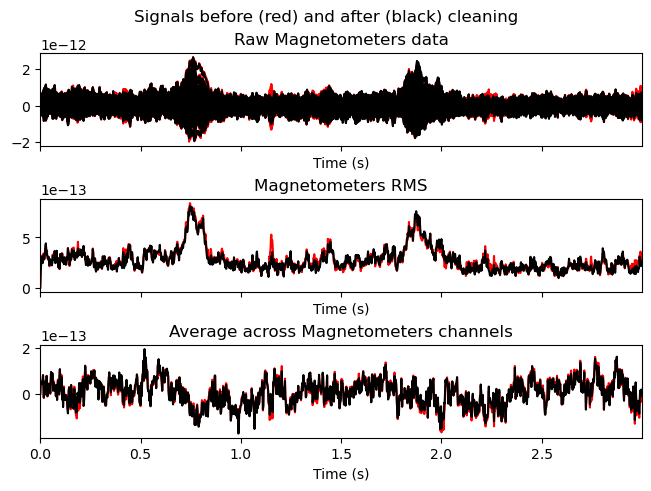

In [6]:
ica.plot_overlay(raw, exclude=[4], picks="eeg")
ica.plot_overlay(raw, exclude=[4], picks="mag")

In [7]:
ica.plot_components()

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 10 Axes>]

In [8]:
ica.exclude = [0, 4] 

In [9]:
reconstr_raw = raw.copy()

In [10]:
ica.apply(reconstr_raw)

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 336 PCA components


<Raw | pre_filtered_data_raw.fif, 343 x 2111000 (4222.0 s), ~5.40 GB, data loaded>

In [11]:
reconstr_raw.save('ica000_eog_raw.fif', overwrite=True)

Overwriting existing file.
Writing /home/ijekt/Documents/cs_cog_fat/ICA_reconstr_raw.fif
Closing /home/ijekt/Documents/cs_cog_fat/ICA_reconstr_raw.fif
Overwriting existing file.
Writing /home/ijekt/Documents/cs_cog_fat/ICA_reconstr_raw-1.fif
Closing /home/ijekt/Documents/cs_cog_fat/ICA_reconstr_raw-1.fif
[done]


In [12]:
raw.plot(duration=5, n_channels=20, scalings='auto')

In [13]:
reconstr_raw.plot(duration=5, n_channels=20, scalings='auto')

In [14]:
#ica.plot_overlay(raw, exclude=[n], picks="eeg")
#ica.plot_overlay(raw, exclude=[n], picks="mag")

NameError: name 'n' is not defined